In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
file_path = 'olympics_dataset.csv'

In [9]:
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [11]:
data.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


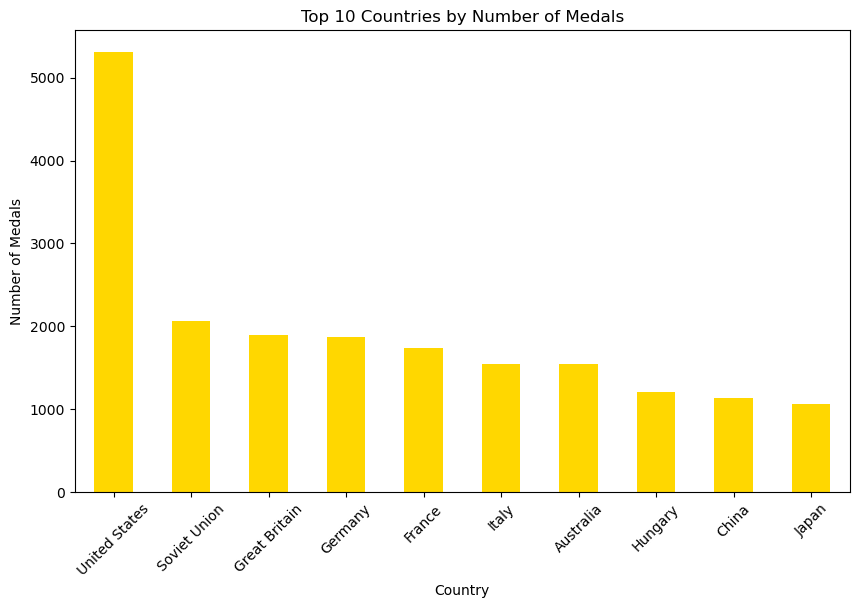

In [30]:
medals_data = data[data['Medal'] != 'No medal']

# Group by Team (Country) and count the number of medals
medals_by_country = medals_data.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)  # Top 10 countries

# Plotting the data
plt.figure(figsize=(10, 6))
medals_by_country.plot(kind='bar', color='gold')
plt.title('Top 10 Countries by Number of Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.savefig('Top_10_Countries_bar_chart.png')
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

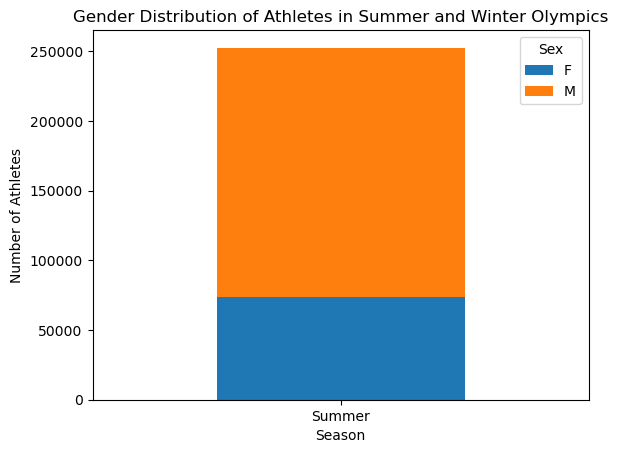

In [32]:
# Group by Sex and Season, then count the number of athletes
gender_distribution = data.groupby(['Season', 'Sex'])['Name'].count().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', stacked=True)
plt.title('Gender Distribution of Athletes in Summer and Winter Olympics')
plt.xlabel('Season')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=0)
plt.savefig('Gender Distribution of Athletes in Summer and Winter Olympics v.png')
plt.show()

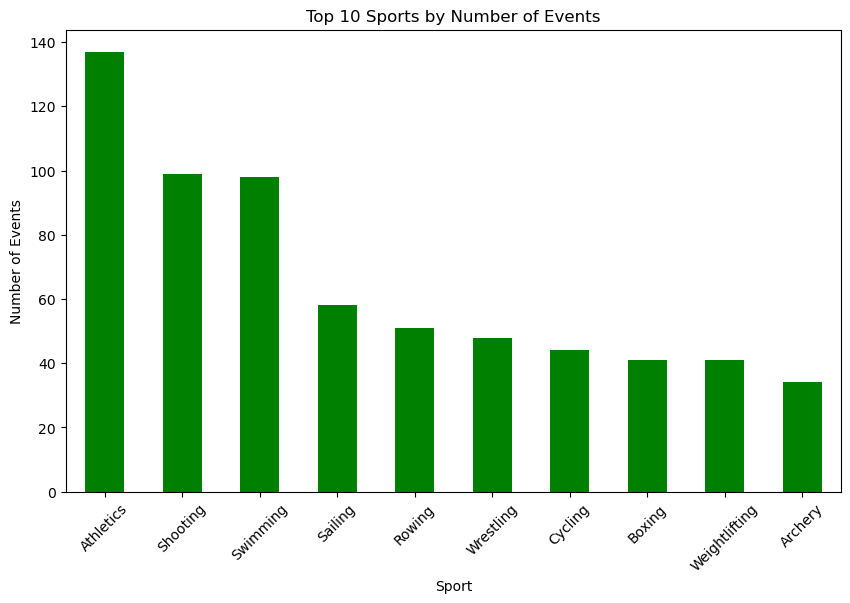

In [26]:
# Group by Sport and count the number of events
events_by_sport = data.groupby('Sport')['Event'].nunique().sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
events_by_sport.plot(kind='bar', color='green')
plt.title('Top 10 Sports by Number of Events')
plt.xlabel('Sport')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.savefig('Top 10 Sports by Number of Events.png')
plt.show()
plt.close()

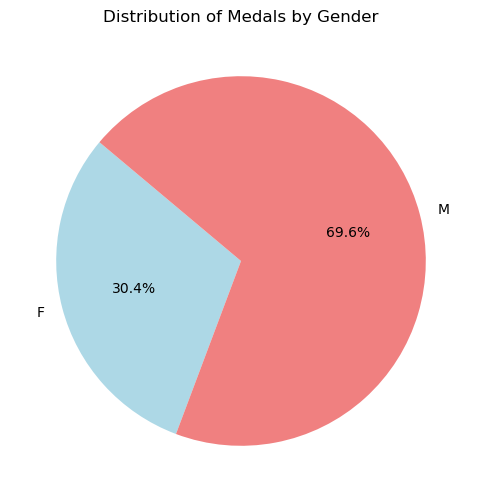

In [28]:
# Filter out rows where no medal was won
medals_data = data[data['Medal'] != 'No medal']

# Group by Sex and count the number of medals
medals_by_gender = medals_data.groupby('Sex')['Medal'].count()

# Plotting the data
plt.figure(figsize=(8, 6))
medals_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Medals by Gender')
plt.ylabel('')  # Hide the y-label
plt.savefig('Distribution of Medals by Gender.png')
plt.show()
plt.close()